In [1]:
from fastai.tabular import *

In [2]:
path = 'C:/Users/Jorge Mejia/Desktop/analisis_de_las_variables_de_la_esquizotipia_con_deep_learning/analisis_con_dataset_original/'
path

'C:/Users/Jorge Mejia/Desktop/analisis_de_las_variables_de_la_esquizotipia_con_deep_learning/analisis_con_dataset_original/'

In [3]:
df = pd.read_csv(path + 'dataset_esquizotipia_original.csv')
df.head()

,ESTRES_PERCIBIDO,CSI_RESPROBL,CSI_REESTCOGN,CSI_APOYOSOC,CSI_EXPEMOC,CSI_EVITPROBL,CSI_PENSDESID,CSI_RETISOC,CSI_AUTOCRIT,ANSIEDADRASGO,...,SCL90_PSICOT,CAPE_POSIT_FREC,CAPE_POS_MALESTAR,CAPE_NEG_FREC,CAPE_NEG_MALESTAR,CAPE_DEPRE_FREC,CAPE_DEPRE_MALESTAR,TRAUMA_FRECUENCIA,TRAUMA_AFECTACION,SPQ_TOTAL_ESQUIZOT
0,23,17,5,0,0,7,5,13,2,20,...,0,24,4,14,0,8,0,4,8,0
1,22,13,11,3,10,6,11,17,11,17,...,9,22,2,29,33,11,3,9,29,0
2,10,20,20,20,16,11,8,3,0,20,...,5,30,9,29,21,10,2,12,25,1
3,7,12,1,0,7,4,6,3,1,18,...,0,20,0,16,2,8,0,4,10,0
4,31,8,9,17,13,4,14,2,6,27,...,17,35,13,36,26,19,19,17,48,2


In [4]:
procs = [FillMissing, Categorify, Normalize]

In [5]:
# se selecciona un 85% de los datos para entrenamiento y un 15% de los datos para validación
valid_idx  =  range ( len ( df ) - 43 ,  len ( df ))

In [6]:
# Se define la variable dependiente
dep_var  =  'SPQ_TOTAL_ESQUIZOT'

In [7]:
data = TabularDataBunch.from_df(path, df, dep_var, valid_idx=valid_idx, procs=procs)
print(data.train_ds.cont_names) # `cont_names` defaults to: set(df)-set(cat_names)-{dep_var}

['CSI_EXPEMOC', 'CSI_RESPROBL', 'CAPE_POSIT_FREC', 'SCL90_DEPRE', 'CSI_AUTOCRIT', 'SCL90_SOMAT', 'CAPE_DEPRE_MALESTAR', 'CSI_APOYOSOC', 'TRAUMA_FRECUENCIA', 'SCL90_OBS_COMP', 'CSL90_HOSTIL', 'CAPE_NEG_MALESTAR', 'SCL90_IDEA_PARAN', 'TRAUMA_AFECTACION', 'SCL90_ANSIE', 'CSI_REESTCOGN', 'ESTRES_PERCIBIDO', 'CSI_EVITPROBL', 'CAPE_NEG_FREC', 'CSI_PENSDESID', 'SCL90_ANS_FOB', 'CSI_RETISOC', 'CSL90_SENS_INT', 'ANSIEDADRASGO', 'CAPE_POS_MALESTAR', 'CAPE_DEPRE_FREC', 'SCL90_PSICOT']


In [8]:
(cat_x,cont_x),y = next(iter(data.train_dl))
for o in (cat_x, cont_x, y): print(to_np(o[:5]))

[0 0 0 0 0]
[[-1.353713  0.699962 -0.635841 -0.689492 ...  0.657926 -0.67388  -0.572246 -0.563347]
 [-1.732255 -0.517872  0.005942 -0.769657 ... -1.942927  0.219723 -0.107953 -0.830457]
 [-0.028819  0.49699   0.166388  0.112166 ...  0.351943  0.331424  0.124194 -0.162684]
 [ 1.674617  1.105907  0.647726  0.272498 ...  0.657926  0.219723  0.124194 -0.429793]
 [ 1.674617  0.294017 -0.314949  0.192332 ...  1.422883 -0.450479  0.124194  0.505089]]
[1 0 0 0 1]


In [9]:
learn = tabular_learner(data, layers=[100,50], metrics=accuracy)
learn.fit(10)

epoch,train_loss,valid_loss,accuracy,time
0,0.975219,0.974701,0.651163,04:09
1,0.845087,0.920076,0.697674,03:17
2,0.779262,0.888977,0.674419,03:14
3,0.722751,0.881313,0.697674,03:16
4,0.669900,0.857558,0.720930,03:58
5,0.622812,0.821768,0.744186,03:14
6,0.577825,0.793830,0.720930,03:27
7,0.543161,0.803076,0.720930,03:16
8,0.503719,0.845622,0.720930,02:48
9,0.473477,0.917938,0.697674,02:46


CSI_EXPEMOC,CSI_RESPROBL,CAPE_POSIT_FREC,SCL90_DEPRE,CSI_AUTOCRIT,SCL90_SOMAT,CAPE_DEPRE_MALESTAR,CSI_APOYOSOC,TRAUMA_FRECUENCIA,SCL90_OBS_COMP,CSL90_HOSTIL,CAPE_NEG_MALESTAR,SCL90_IDEA_PARAN,TRAUMA_AFECTACION,SCL90_ANSIE,CSI_REESTCOGN,ESTRES_PERCIBIDO,CSI_EVITPROBL,CAPE_NEG_FREC,CSI_PENSDESID,SCL90_ANS_FOB,CSI_RETISOC,CSL90_SENS_INT,ANSIEDADRASGO,CAPE_POS_MALESTAR,CAPE_DEPRE_FREC,SCL90_PSICOT,target,prediction
0.3497,-0.7208,-0.1545,0.8337,2.0858,0.5156,0.4405,1.6052,-0.3719,0.3242,-0.6153,-0.0425,-0.8979,-0.1317,0.6526,-0.3993,1.5861,1.6571,0.0361,0.7717,-0.6880,-0.8236,-0.6075,0.3519,0.2197,0.1242,0.5051,0,0
-0.0288,1.5119,-0.3149,-1.0102,-0.5605,-0.9378,-0.9407,-0.0856,-0.9380,-1.0786,-0.6153,-0.1338,-0.8979,-0.7283,-0.9115,1.8312,-1.2839,-0.5445,-0.3691,-1.2250,-0.6880,-0.4005,-0.8801,-0.7190,-0.6739,-0.8044,-0.8305,0,0
0.1605,-0.3149,-0.1545,1.7155,0.4980,1.8721,1.4073,-0.0856,-0.7493,1.1874,0.4588,0.6884,1.2508,-0.6005,2.5776,0.3442,1.1077,0.3361,0.1712,0.1061,2.0954,0.2342,0.6192,0.1990,0.2197,0.5885,1.1729,0,0
-1.3537,-1.5327,-0.3149,1.2345,-0.3841,0.5156,0.0261,-1.4383,1.9866,1.1874,1.3180,0.0489,0.0788,1.6155,-0.3100,-1.1428,0.8686,2.7579,1.7921,0.6053,0.0542,2.5613,0.3466,-1.0250,-0.4505,1.2849,-0.1627,1,0
-1.5430,-1.7357,-0.1545,0.4328,0.4980,1.0000,1.9598,-1.6073,-0.3719,0.7558,0.0292,1.3279,1.4461,0.1666,0.5323,-1.7004,1.3469,-1.2050,1.2518,-1.0586,0.2398,1.0804,1.3007,-0.8720,0.3314,1.0528,0.2380,1,1


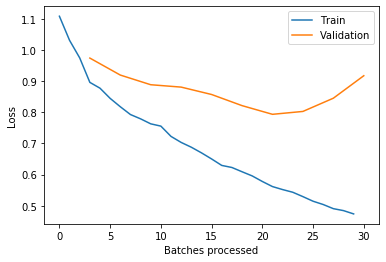

In [10]:
learn.recorder.plot_losses()
learn.show_results()